<a href="https://colab.research.google.com/github/mostafasameer-transportation/CARLA-Manual-Control-Steering-Wheel/blob/main/Structural_Dynamics_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Define System Properties and Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# System Properties
m = 0.2533  # kip-sec²/in
k = 10.0    # kips/in
Tn = 1.0    # sec
wn = 2 * np.pi / Tn  # Natural frequency in rad/sec
xi = 0.05   # Damping ratio

# Time Parameters
dt = 0.005  # sec
t_end = 10.0  # sec
time_steps = int(t_end / dt)

# Half-cycle sine pulse parameters
t_pulse_end = 1.0  # end time of the pulse (1 sec for half cycle)
force_amplitude = 1.0  # Arbitrary amplitude of the force

Step 2: Create the Applied Force Function

In [2]:
def applied_force(t):
    if t < t_pulse_end:  # Apply force only during the pulse
        return force_amplitude * np.sin(np.pi * t / t_pulse_end)
    else:
        return 0.0

Step 3: Create the Response Arrays

In [3]:
u = np.zeros(time_steps)  # Displacement response
v = np.zeros(time_steps)  # Velocity response
a = np.zeros(time_steps)  # Acceleration response
p = np.zeros(time_steps)  # Force response

Step 4: Calculate the Force Vector

In [4]:
for i in range(time_steps):
    p[i] = applied_force(i * dt)

Step 5: Implement Central Difference Method

In [5]:
for i in range(1, time_steps):
    if i == 1:
        # Initial conditions
        a[i-1] = p[i-1] / m  # First acceleration
        u[i] = u[i-1] + v[i-1] * dt + 0.5 * a[i-1] * dt**2
    else:
        a[i] = (p[i] - k * u[i-1]) / m
        u[i] = u[i-1] + v[i-1] * dt + 0.5 * a[i] * dt**2
        v[i] = v[i-1] + 0.5 * (a[i] + a[i-1]) * dt

Step 6: Implement Newmark Method

In [6]:
beta = 0.25  # Newmark parameter for constant average acceleration
gamma = 0.5  # Newmark parameter for linear acceleration

# Initialize variables for Newmark method
u_newmark = np.zeros(time_steps)
v_newmark = np.zeros(time_steps)
a_newmark = np.zeros(time_steps)

# Newmark iterations
for i in range(1, time_steps):
    # Effective stiffness and force
    k_eff = k + gamma * dt * m / (2 * beta)
    f_eff = p[i] + m * (a_newmark[i - 1] + beta * dt * v_newmark[i - 1]) / beta

    # Calculate new displacement
    u_newmark[i] = u_newmark[i - 1] + dt * v_newmark[i - 1] + (dt ** 2 * (0.5 - beta)) * a_newmark[i - 1]
    u_newmark[i] += (dt ** 2 / (2 * beta)) * (f_eff / k_eff)

    # Update acceleration
    a_newmark[i] = (f_eff - k * u_newmark[i]) / m

    # Update velocity
    v_newmark[i] = v_newmark[i - 1] + dt * ((1 - gamma) * a_newmark[i - 1] + gamma * a_newmark[i])

<ipython-input-6-7346c83153f2>:20: RuntimeWarning: overflow encountered in scalar divide
  a_newmark[i] = (f_eff - k * u_newmark[i]) / m
<ipython-input-6-7346c83153f2>:20: RuntimeWarning: invalid value encountered in scalar subtract
  a_newmark[i] = (f_eff - k * u_newmark[i]) / m


Step 7: Plot the Results

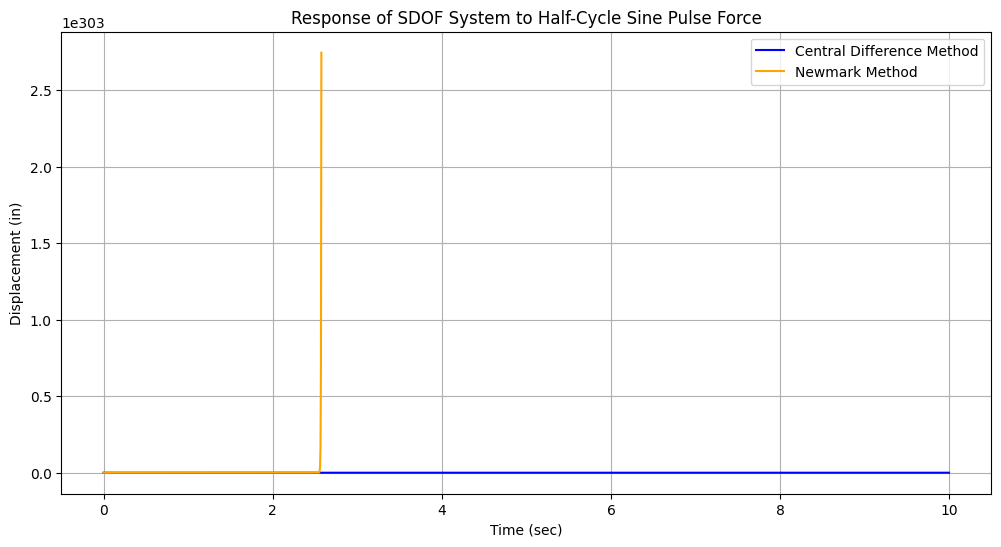

In [7]:
time = np.arange(0, t_end, dt)

plt.figure(figsize=(12, 6))
plt.plot(time, u, label='Central Difference Method', color='blue')
plt.plot(time, u_newmark, label='Newmark Method', color='orange')
plt.title('Response of SDOF System to Half-Cycle Sine Pulse Force')
plt.xlabel('Time (sec)')
plt.ylabel('Displacement (in)')
plt.grid()
plt.legend()
plt.show()